In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cleaned_data.csv")

In [3]:
df.loc[df["TERRITORY"]=="Earth","TERRITORY"]="AMER"

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,No AddressLine2,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,No AddressLine2,Reims,No State mentioned,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,No AddressLine2,Paris,No State mentioned,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,No AddressLine2,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,No AddressLine2,San Francisco,CA,000000,USA,AMER,Brown,Julie,Medium


In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

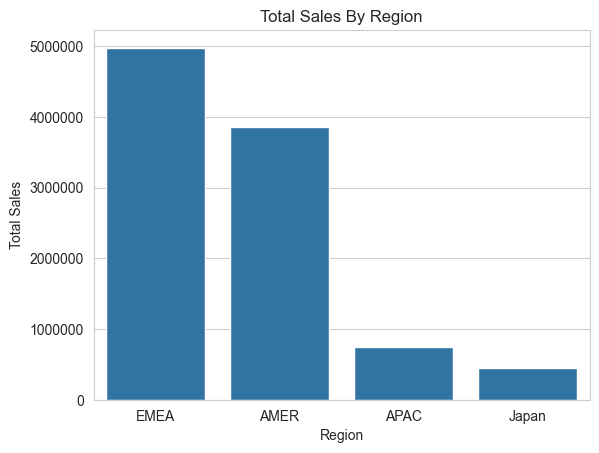

In [6]:
region_sales=df.groupby("TERRITORY")["SALES"].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index,y=region_sales.values)
plt.title("Total Sales By Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.ticklabel_format(style="plain",axis="y")
plt.savefig("total_sales_by_region.png")
plt.show()

In [7]:
region_sales

TERRITORY
EMEA     4979272.41
AMER     3852061.39
APAC      746121.83
Japan     455173.22
Name: SALES, dtype: float64

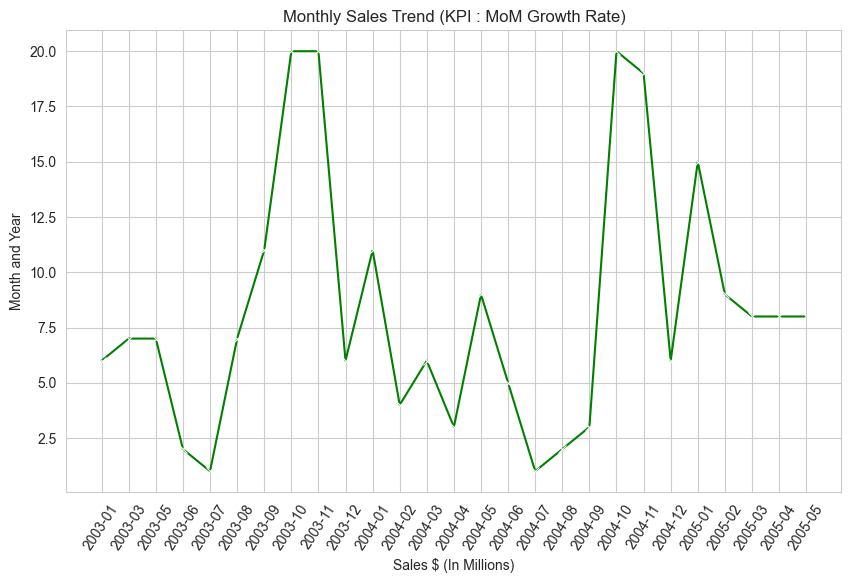

In [8]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"],errors="coerce")
monthly_sales = df[(df["PRODUCTLINE"] == "Vintage Cars") & (df["COUNTRY"] == "USA")].groupby(df["ORDERDATE"].dt.to_period("M"))["SALES"].count()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index.astype(str),y=monthly_sales.values,marker="x",color="green")
plt.title("Monthly Sales Trend (KPI : MoM Growth Rate)")
plt.ylabel("Month and Year")
plt.xlabel("Sales $ (In Millions)")
plt.xticks(rotation=57)
# plt.tight_layout()
plt.savefig('Day4_MoM Sales on Vintage Cars only on USA.jpg')
plt.show()

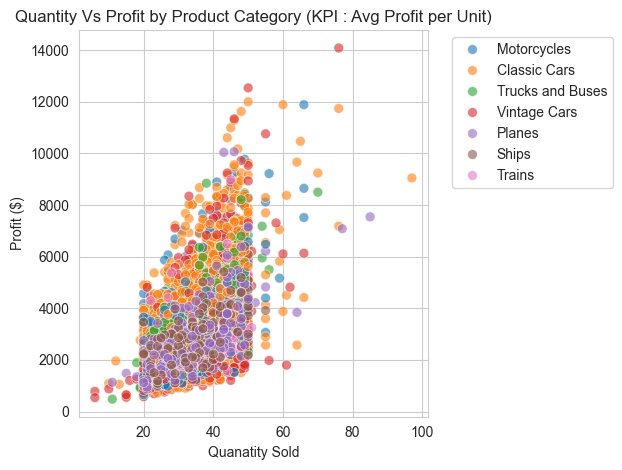

In [9]:
sns.scatterplot(data= df,x="QUANTITYORDERED",y="SALES",hue="PRODUCTLINE",alpha=0.6,s=50)
plt.title("Quantity Vs Profit by Product Category (KPI : Avg Profit per Unit)")
plt.xlabel("Quanatity Sold")
plt.ylabel("Profit ($)")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.tight_layout()
plt.savefig("Quantity_vs_Profit for all markets.jpg")

plt.show()

In [10]:
df.loc[df["PRODUCTLINE"] == "Vintage Cars"]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
475,10102,39,100.00,2,4808.31,2003-01-10,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,AMER,Frick,Michael,Medium
476,10111,33,99.66,6,3288.78,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,No AddressLine2,San Francisco,CA,000000,USA,AMER,Murphy,Julie,Medium
477,10125,32,100.00,1,3254.72,2003-05-21,Shipped,2,5,2003,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
478,10139,31,100.00,7,3184.94,2003-07-16,Shipped,3,7,2003,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
479,10149,50,100.00,4,5907.50,2003-09-12,Shipped,3,9,2003,...,2793 Furth Circle,No AddressLine2,Brisbane,CA,94217,USA,AMER,Taylor,Sue,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,10375,49,65.80,5,3224.20,2005-02-03,Shipped,1,2,2005,...,"67, rue des Cinquante Otages",No AddressLine2,Nantes,No State mentioned,44000,France,EMEA,Labrune,Janine,Medium
2374,10388,27,100.00,1,3211.38,2005-03-03,Shipped,1,3,2005,...,1785 First Street,No AddressLine2,New Bedford,MA,50553,USA,AMER,Benitez,Violeta,Medium
2375,10398,49,36.66,5,1796.34,2005-03-30,Shipped,1,3,2005,...,59 rue de l'Abbaye,No AddressLine2,Reims,No State mentioned,51100,France,EMEA,Henriot,Paul,Small
2376,10401,56,35.35,7,1979.60,2005-04-03,On Hold,2,4,2005,...,7476 Moss Rd.,No AddressLine2,Newark,NJ,94019,USA,AMER,Brown,William,Small


In [11]:
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [12]:
display(df.groupby(["TERRITORY","COUNTRY"])["ORDERNUMBER"].count().to_frame())

ORDERNUMBER
TERRITORY COUNTRY                 
AMER      Canada                70
          USA                 1004
APAC      Australia            185
          Singapore             36
EMEA      Austria               55
          Belgium               33
          Denmark               63
          Finland               92
          France               314
          Germany               62
          Ireland               16
          Italy                113
          Norway                85
          Spain                342
          Sweden                57
          Switzerland           31
          UK                   144
Japan     Japan                 52
          Philippines           26
          Singapore             43